## Background Registration
Wed. 21 Oct. 2020

Register images to the target round 0 -- the background channel.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mpleximreg import registration, viz, utils
from imageio import imread, imwrite
from pandas import read_csv, DataFrame
import seaborn as sns

from os import makedirs
from os.path import join

import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['axes.titlesize'] = 18

### Global parameters for notebook

In [14]:
# directories
brca_tif_dir = '/mnt/nvme/SageBionetworks/Registration/breastCancer/'  # raw unaligned images
brca_r1_nr_dir = '/mnt/nvme/SageBionetworks/Registration/breastCancer-Round1Channel2Reg/'  # target round 1 - channel 2
brca_r0_nr_dir = '/mnt/nvme/SageBionetworks/Registration/breastCancer-Round0Channel2Reg/'  # target round 0 - channel 2
brca_cropped_dir = '/mnt/nvme/SageBionetworks/Registration/breastCancerCropped'
brca_cropped_r0_nr_dir = '/mnt/nvme/SageBionetworks/Registration/breastCancerCropped-Reg'

brca_tif_dict = utils.parse_tif_dir(brca_tif_dir)

im_res = 0.32  # micro-meter per pixel

# csv filepaths
raw_csv = 'Data_Files/brca_kp_distances.csv'
data_csv = 'Data_Files/brca_kp_distances_extra.csv'

# read the results from the hackathon -- format into format to plot
df = read_csv('Data_Files/brca_kp_distances.csv')
data = {'Moving': [], 'Dataset': [], 'Registration Error': [], 'Mean Distance': 0}

for i, r in df.iterrows():
    data['Moving'].extend([r.Moving] * 4)
    data['Dataset'].append('Unaligned')
    data['Registration Error'].append(r['Unaligned'])
    data['Dataset'].append('OHSU Aligned')
    data['Registration Error'].append(r['OHSU Aligned'])
    data['Dataset'].append('Rigid alignment on DAPI')
    data['Registration Error'].append(r['Rigid alignment on DAPI'])
    data['Dataset'].append('Non-rigid alignment on channel 2')
    data['Registration Error'].append(r['Non-rigid alignment on channel 2'])
df = DataFrame(data)
df

,Moving,Dataset,Registration Error,Mean Distance
0,R2,Unaligned,0.026000,0
1,R2,OHSU Aligned,0.000105,0
2,R2,Rigid alignment on DAPI,0.000107,0
3,R2,Non-rigid alignment on channel 2,0.000156,0
4,R3,Unaligned,0.024000,0
5,R3,OHSU Aligned,0.000123,0
6,R3,Rigid alignment on DAPI,0.000122,0
7,R3,Non-rigid alignment on channel 2,0.000274,0
8,R4,Unaligned,0.026000,0
9,R4,OHSU Aligned,0.000112,0


## 1) Round 1 as target round (hackathon approach)
This uses the non-rigid registration approach on channel 2 of rounds.

In [5]:
# runs non-rigid transformation on an entire using specified target_round / channel
registration.nonrigid_transform_dir(brca_tif_dir, brca_r1_nr_dir, target_round=1)

Registering round 9
Registering round 2
Registering round 4
Registering round 5
Registering round 7
Registering round 11
Registering round 8
Registering round 6
Registering round 3
Registering round 10


## 2) Round 0 as target round (background round)
Uses channel 2 in every round.

In [ ]:
# runs non-rigid transformation on an entire using specified target_round / channel
registration.nonrigid_transform_dir(brca_tif_dir, brca_r0_nr_dir, target_round=0)

## 3.1) Manually crop images - remove adjacent TMA tissue
For every round in the breast cancer unregistered tif dir, crop all the channel images in that round to remove any adjacent TMA tissue. Save this to a separate dir for running registration.

In [ ]:
# create dir to save new "cropped" images
makedirs(brca_cropped_dir, exist_ok=True)

# create a dict with the left and bottom coordiates to crop image with
# note that adjacent TMAs in this dataset are only seen in the left and bottom
crop_dicts = {
    0: {'left': 500, 'bottom': 5000}, 1: {'left': 1000, 'bottom': 5000}, 2: {'left': 1000, 'bottom': 5000},
    3: {'left': 1000, 'bottom': 4500}, 4: {'left': 0, 'bottom': 5000}, 5: {'left': 1000, 'bottom': 4500},
    6: {'left': 0, 'bottom': 4500}, 7: {'left': 1000, 'bottom': 5000}, 8: {'left': 1000, 'bottom': 4500},
    9: {'left': 1000, 'bottom': 5000}, 10: {'left': 1000, 'bottom': 5000}, 11: {'left': 1000, 'bottom': 5000}
}

# loop through each round
for _round, channel_dict in brca_tif_dict.items():
    # croop coordinates for this round
    crop_dict = crop_dicts[_round]
    
    # loop through each channel in round
    for impath in channel_dict.values():
        filename = impath.split('/')[-1]
        
        # read image
        im = imread(impath)
        
        # crop the image
        im = im[0:crop_dict['bottom'], crop_dict['left']::]
        
        # save the image
        imwrite(join(brca_cropped_dir, filename), im)

## 3.2) Register cropped tif dir using round 0 as target round & channel 2

In [ ]:
# runs non-rigid transformation on an entire using specified target_round / channel
registration.nonrigid_transform_dir(brca_cropped_dir, brca_cropped_nr_dir, target_round=0)

## 4) Caluculate TRE / mean distances for all directories
New functionality now adds mean distances in pixel length that can be converted to micro-meter.

In [15]:
# recreating hackathon non-rigid results
results = registration.tre_dir(brca_r1_nr_dir, 'Round1Channel2Reg')

# append results to the hackathon results for plotting
df_all = df.append(results, ignore_index=True)

Calculating for round 9
Calculating for round 2
Calculating for round 4
Calculating for round 5
Calculating for round 7
Calculating for round 11
Calculating for round 8
Calculating for round 6
Calculating for round 3
Calculating for round 10


In [16]:
# non-rigid registration with round 0 as target round and channel 2
results = registration.tre_dir(brca_r0_nr_dir, 'Round0Channel2Reg')

# append results to the hackathon results for plotting
df_all = df_all.append(results, ignore_index=True)

Calculating for round 9
Calculating for round 2
Calculating for round 4
Calculating for round 5
Calculating for round 7
Calculating for round 11
Calculating for round 8
Calculating for round 6
Calculating for round 3
Calculating for round 10


In [17]:
# non-rigid registration with round 0 as target round and channel 2 on cropped images
results = registration.tre_dir(brca_cropped_nr_dir, 'ManualCrop-NR')

# append results to the hackathon results for plotting
df_all = df_all.append(results, ignore_index=True)
df_all.to_csv(data_csv, index=False)

Calculating for round 9
Calculating for round 2
Calculating for round 4
Calculating for round 5
Calculating for round 7
Calculating for round 11
Calculating for round 8
Calculating for round 6
Calculating for round 3
Calculating for round 10


## Interactors

### Visualize tif dirs

In [ ]:
# specify the directory to read
tiff_dirs = [brca_tif_dir, brca_cropped_dir, brca_cropped_nr_dir]

viz.interact_tif_dirs(tiff_dirs)

### Plot TRE Results

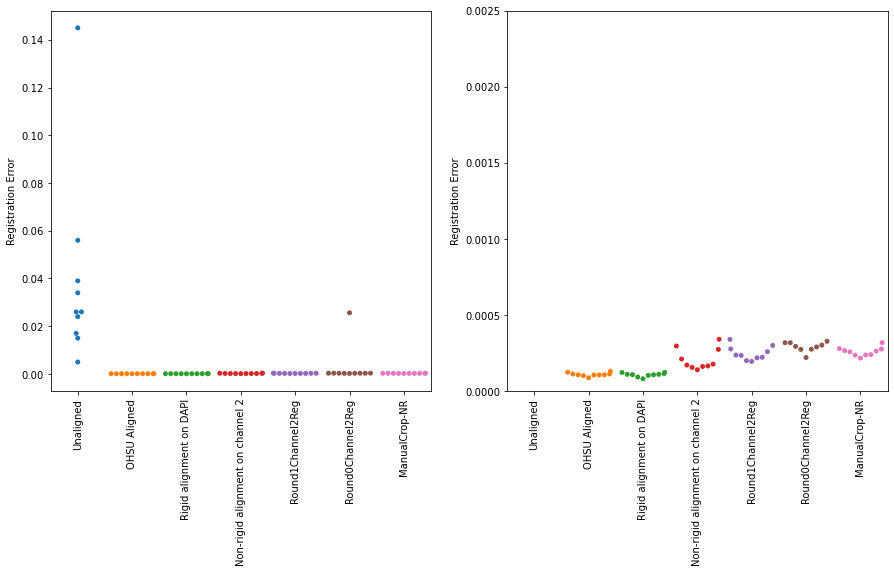

In [26]:
# read the csv
df_all = read_csv(data_csv)

order = ['Unaligned', 'OHSU Aligned', 'Rigid alignment on DAPI', 'Non-rigid alignment on channel 2', 'Round1Channel2Reg',
         'Round0Channel2Reg', 'ManualCrop-NR']

# plot the results
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
sns.swarmplot(x='Dataset', y='Registration Error', data=df_all, ax=ax[0], order=order)
sns.swarmplot(x='Dataset', y='Registration Error', data=df_all, ax=ax[1], order=order)
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[1].set_ylim([0, 0.0025])
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
plt.show()

### Plot the mean distance results

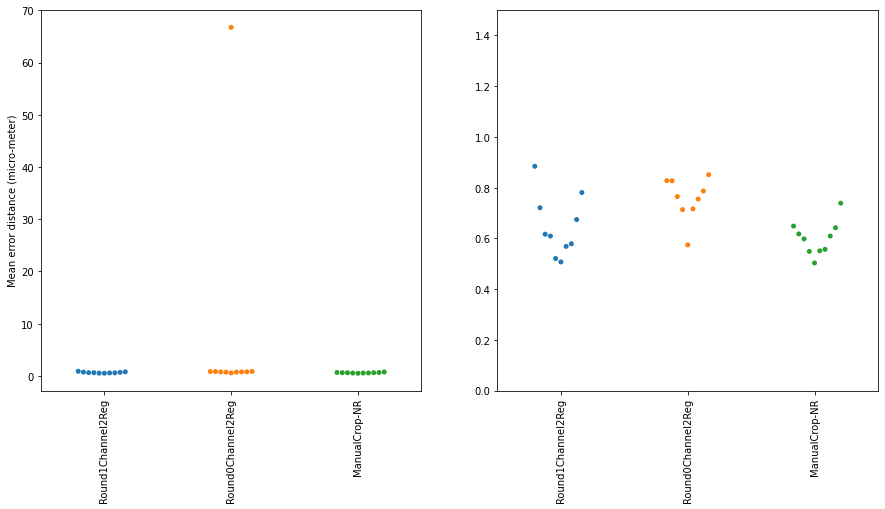

In [32]:
df_all = read_csv(data_csv)

# convert the mean distance from pixels to micrometers
df_all['Mean Distance'] = df_all['Mean Distance'] * im_res

order = ['Round1Channel2Reg', 'Round0Channel2Reg', 'ManualCrop-NR']

fig, ax = plt.subplots(ncols=2, figsize=(15,7))
sns.swarmplot(x='Dataset', y='Mean Distance', data=df_all, ax=ax[0], order=order)
sns.swarmplot(x='Dataset', y='Mean Distance', data=df_all, ax=ax[1], order=order)
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('Mean error distance (micro-meter)')
ax[1].set_ylabel('')
ax[1].set_ylim([0, 1.5])
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
plt.show()